In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import boxcox
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from collections import Counter as ctr

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.shape

(103904, 25)

In [4]:
df_test.shape

(25976, 25)

In [5]:
df_test.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
df_train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [8]:
df_train.sample(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
47131,47131,32853,Male,Loyal Customer,25,Personal Travel,Eco,216,2,1,...,5,1,4,2,2,3,5,0,0.0,neutral or dissatisfied
520,520,73967,Male,Loyal Customer,12,Personal Travel,Eco,2342,3,1,...,4,2,3,4,3,3,4,31,22.0,neutral or dissatisfied
100136,100136,98936,Female,Loyal Customer,34,Business travel,Business,2554,4,1,...,4,4,4,4,4,4,4,0,3.0,neutral or dissatisfied
100911,100911,110450,Male,Loyal Customer,55,Personal Travel,Eco,925,2,4,...,2,5,3,4,5,4,2,10,13.0,neutral or dissatisfied
60782,60782,128380,Female,Loyal Customer,41,Business travel,Business,1905,0,0,...,5,5,5,5,4,5,4,0,0.0,satisfied


In [9]:
df_train.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [10]:
df_train.drop(['Unnamed: 0','id'],inplace=True,axis=1)
df_test.drop(['Unnamed: 0','id'],inplace=True,axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [12]:
df_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [13]:
df_test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

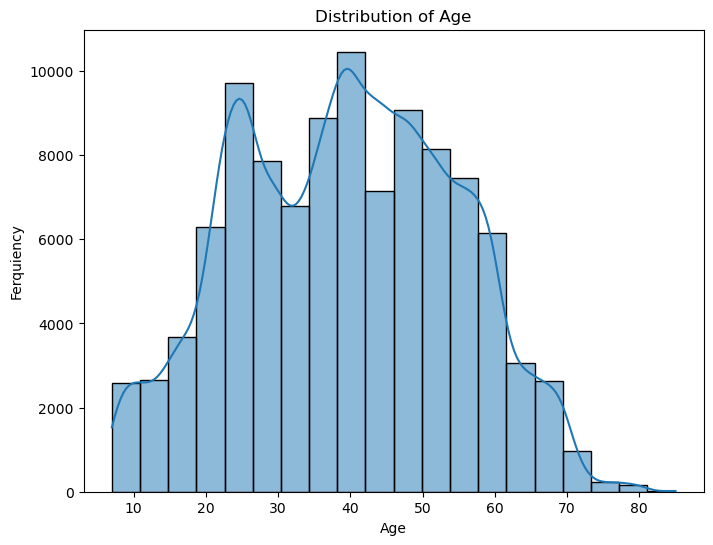

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(df_train['Age'],bins=20,kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Ferquiency')
plt.show()

In [15]:
ctr(df_train['Gender'])

Counter({'Male': 51177, 'Female': 52727})

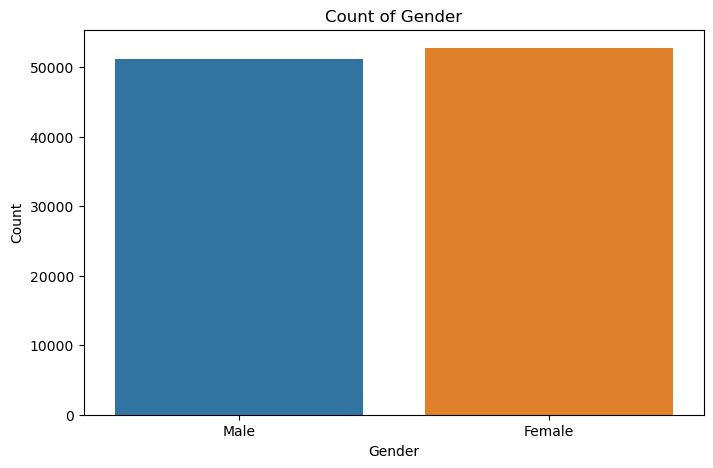

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender',data=df_train)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

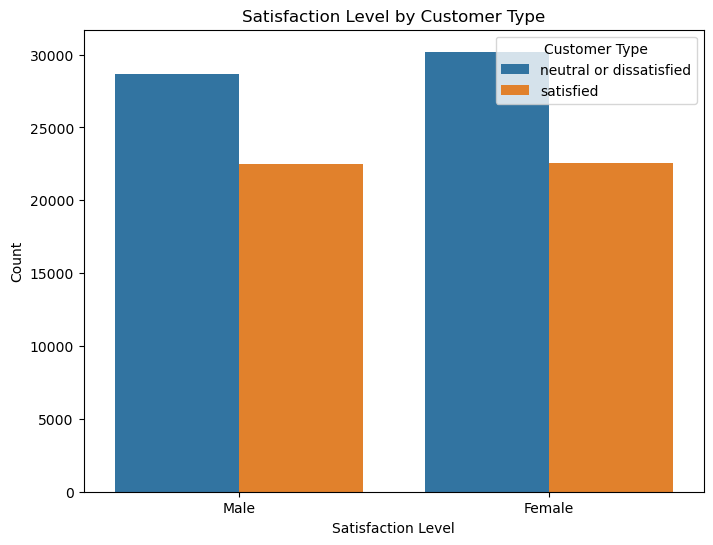

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='satisfaction', data=df_train)
plt.title('Satisfaction Level by Customer Type')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.show()

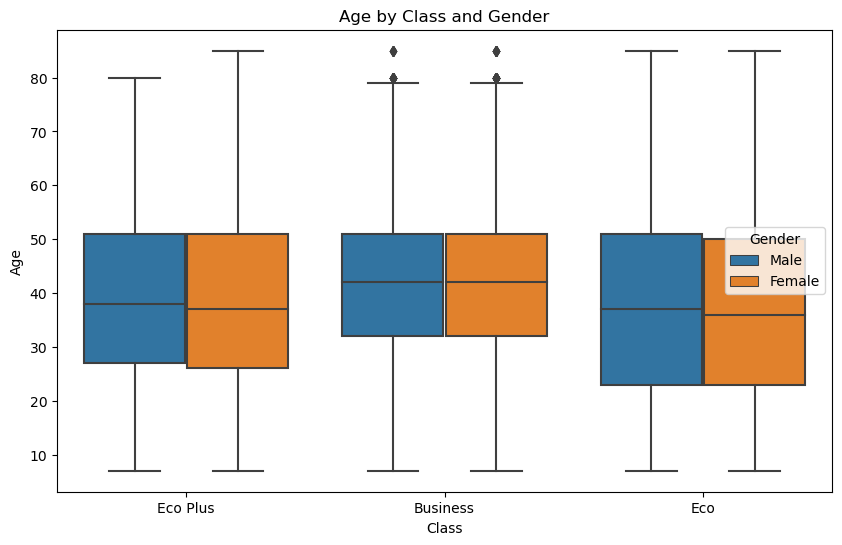

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Age', hue='Gender', data=df_train)
plt.title('Age by Class and Gender')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

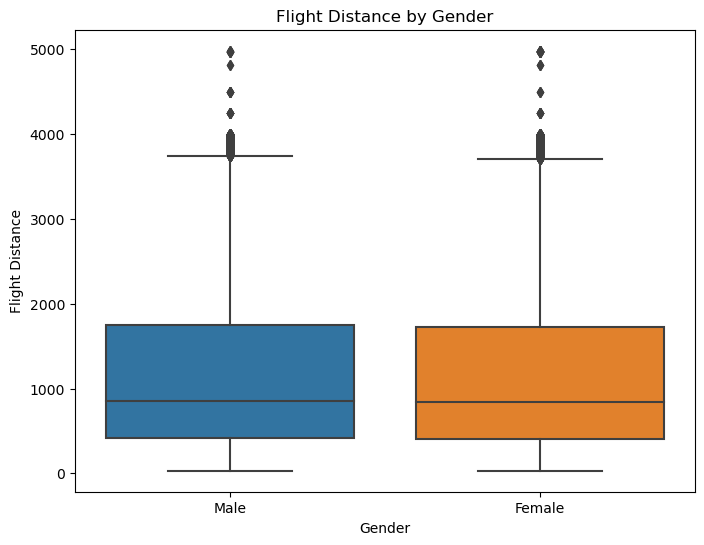

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Flight Distance', data=df_train)
plt.title('Flight Distance by Gender')
plt.xlabel('Gender')
plt.ylabel('Flight Distance')
plt.show()

In [20]:
ctr(df_train['Customer Type'])

Counter({'Loyal Customer': 84923, 'disloyal Customer': 18981})

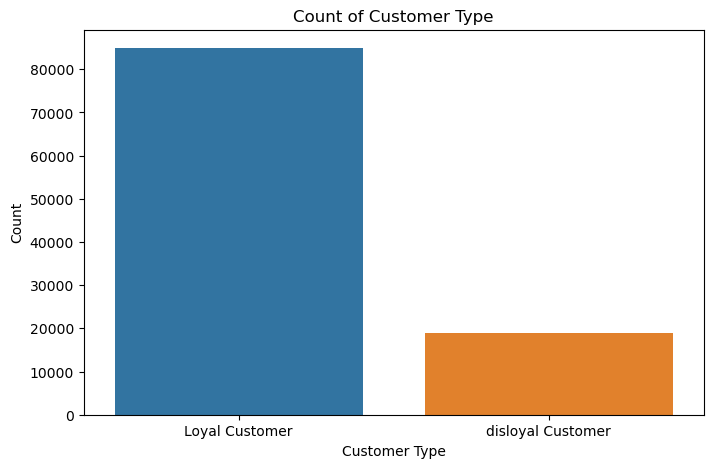

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer Type', data=df_train)
plt.title('Count of Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

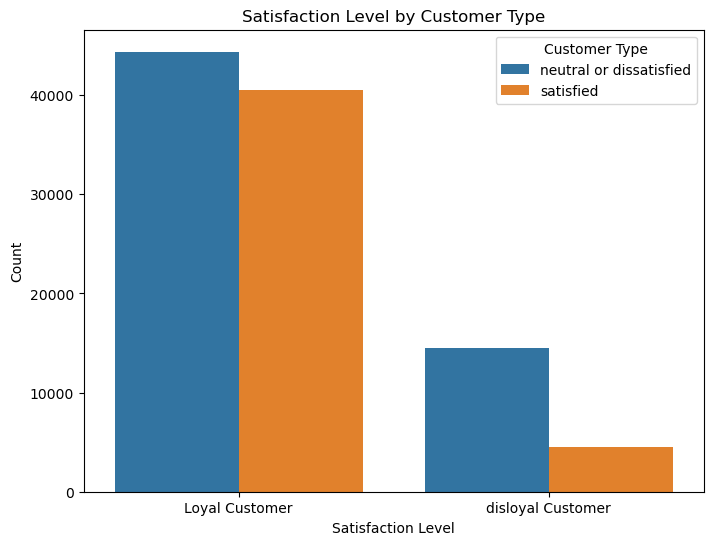

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer Type', hue='satisfaction', data=df_train)
plt.title('Satisfaction Level by Customer Type')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.show()

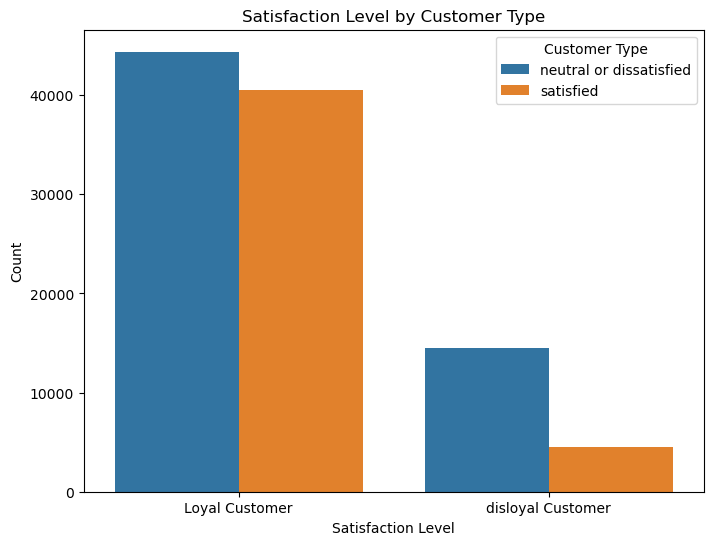

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer Type', hue='satisfaction', data=df_train)
plt.title('Satisfaction Level by Customer Type')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.show()

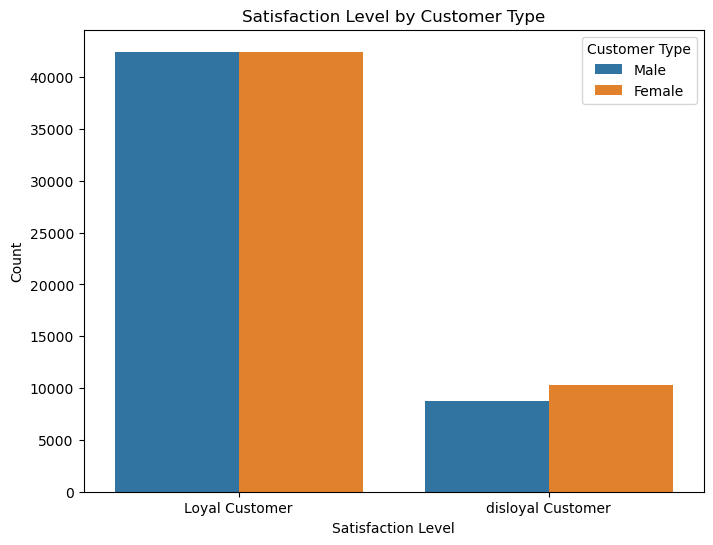

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer Type', hue='Gender', data=df_train)
plt.title('Satisfaction Level by Customer Type')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.show()

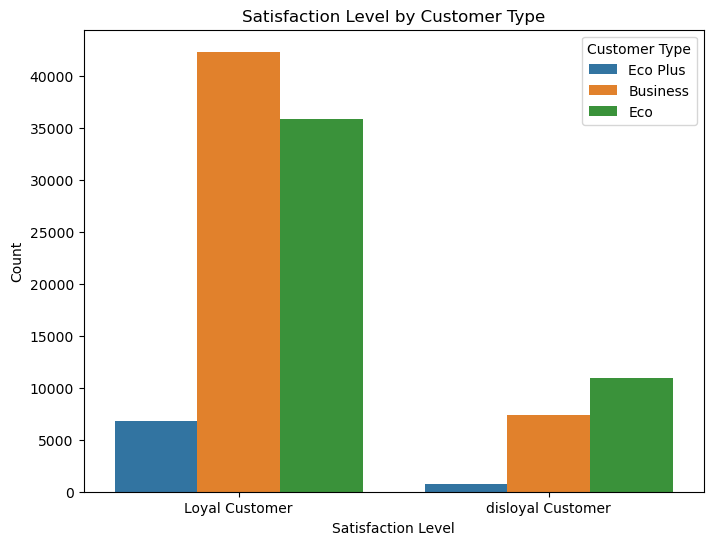

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer Type', hue='Class', data=df_train)
plt.title('Satisfaction Level by Customer Type')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.show()

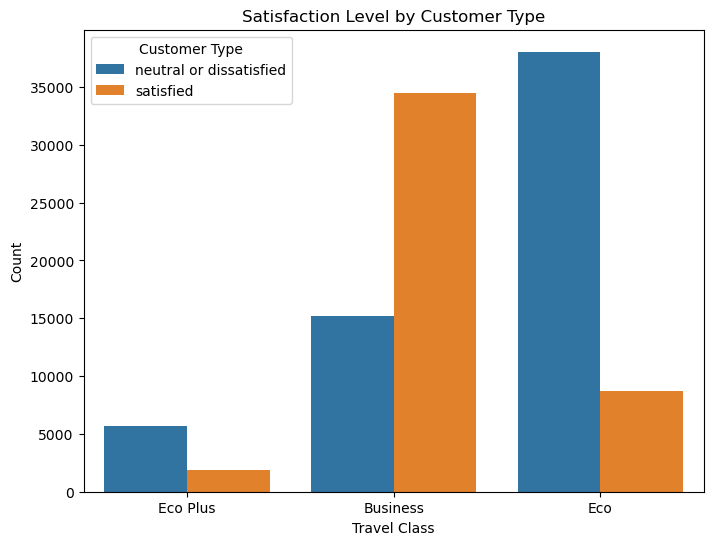

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(hue='satisfaction', x='Class', data=df_train)
plt.title('Satisfaction Level by Customer Type')
plt.xlabel('Travel Class')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.show()

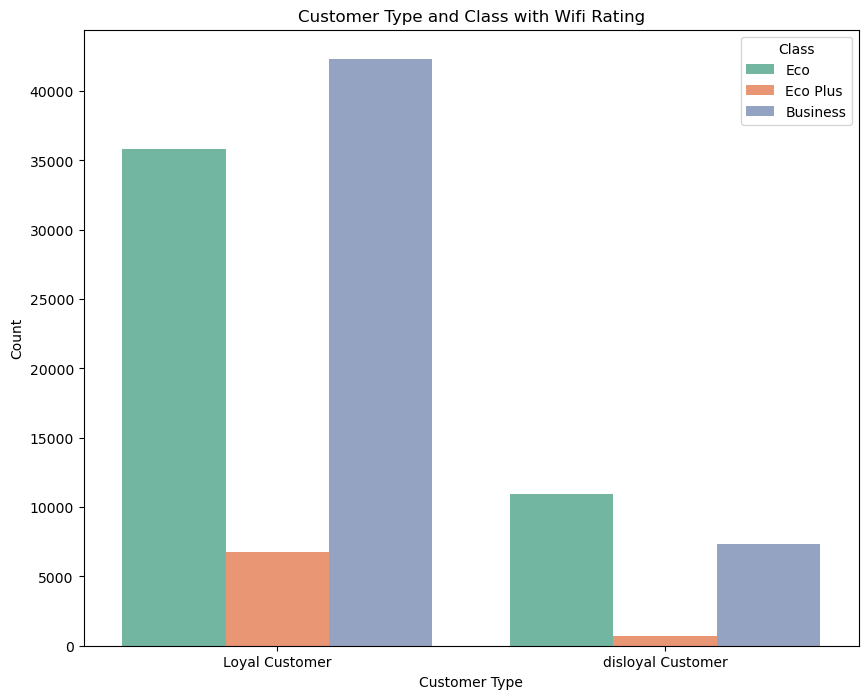

In [27]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Customer Type', hue='Class', data=df_train, palette='Set2', hue_order=['Eco', 'Eco Plus', 'Business'])
plt.title('Customer Type and Class with Wifi Rating')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

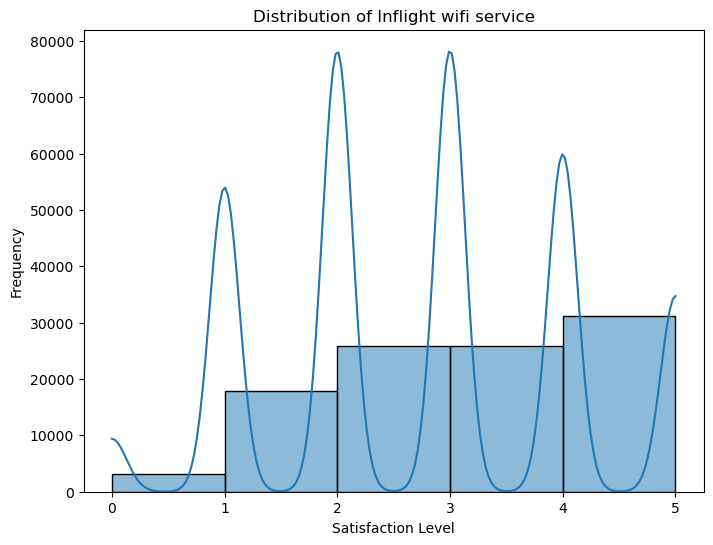

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df_train['Inflight wifi service'], bins=5, kde=True)
plt.title('Distribution of Inflight wifi service')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

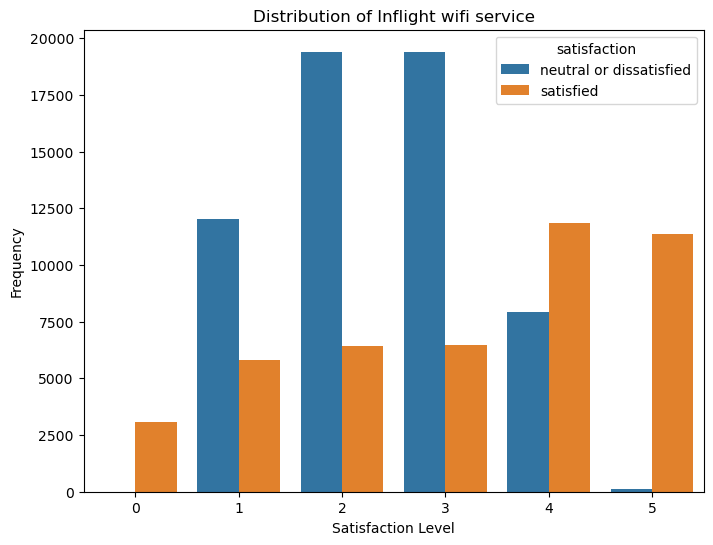

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df_train['Inflight wifi service'],hue=df_train['satisfaction'])
plt.title('Distribution of Inflight wifi service')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

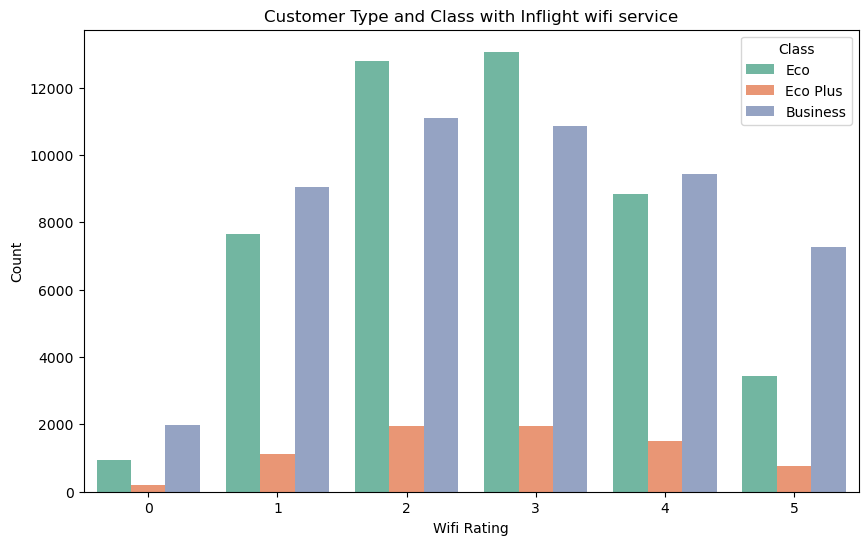

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Inflight wifi service', hue='Class', data=df_train, palette='Set2', hue_order=['Eco', 'Eco Plus', 'Business'])
plt.title('Customer Type and Class with Inflight wifi service')
plt.xlabel('Wifi Rating')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

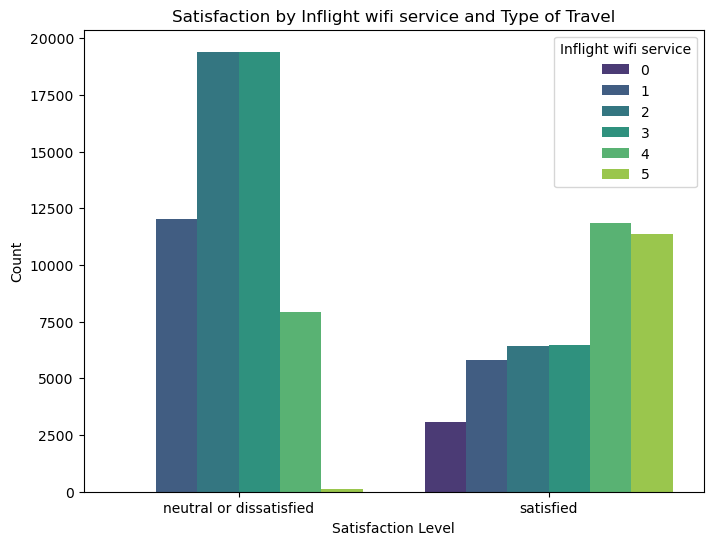

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='satisfaction', hue='Inflight wifi service', data=df_train, palette='viridis')
plt.title('Satisfaction by Inflight wifi service and Type of Travel')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.legend(title='Inflight wifi service')
plt.show()

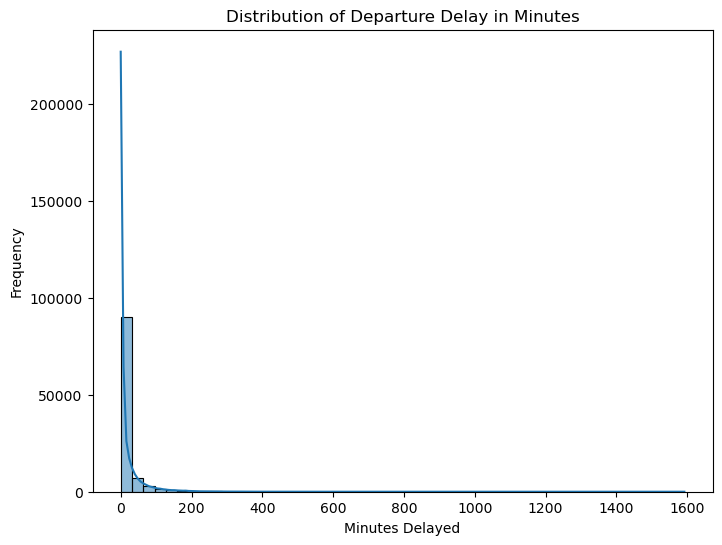

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(df_train['Departure Delay in Minutes'], bins=50, kde=True)
plt.title('Distribution of Departure Delay in Minutes')
plt.xlabel('Minutes Delayed')
plt.ylabel('Frequency')
plt.show()

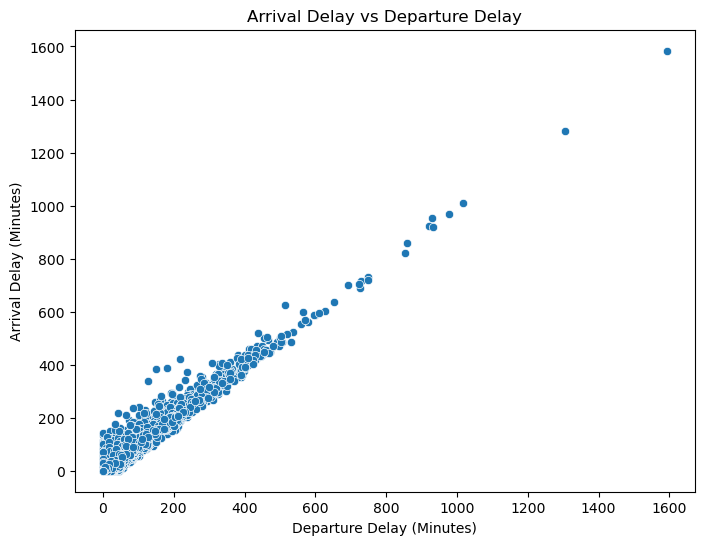

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', data=df_train)
plt.title('Arrival Delay vs Departure Delay')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Arrival Delay (Minutes)')
plt.show()

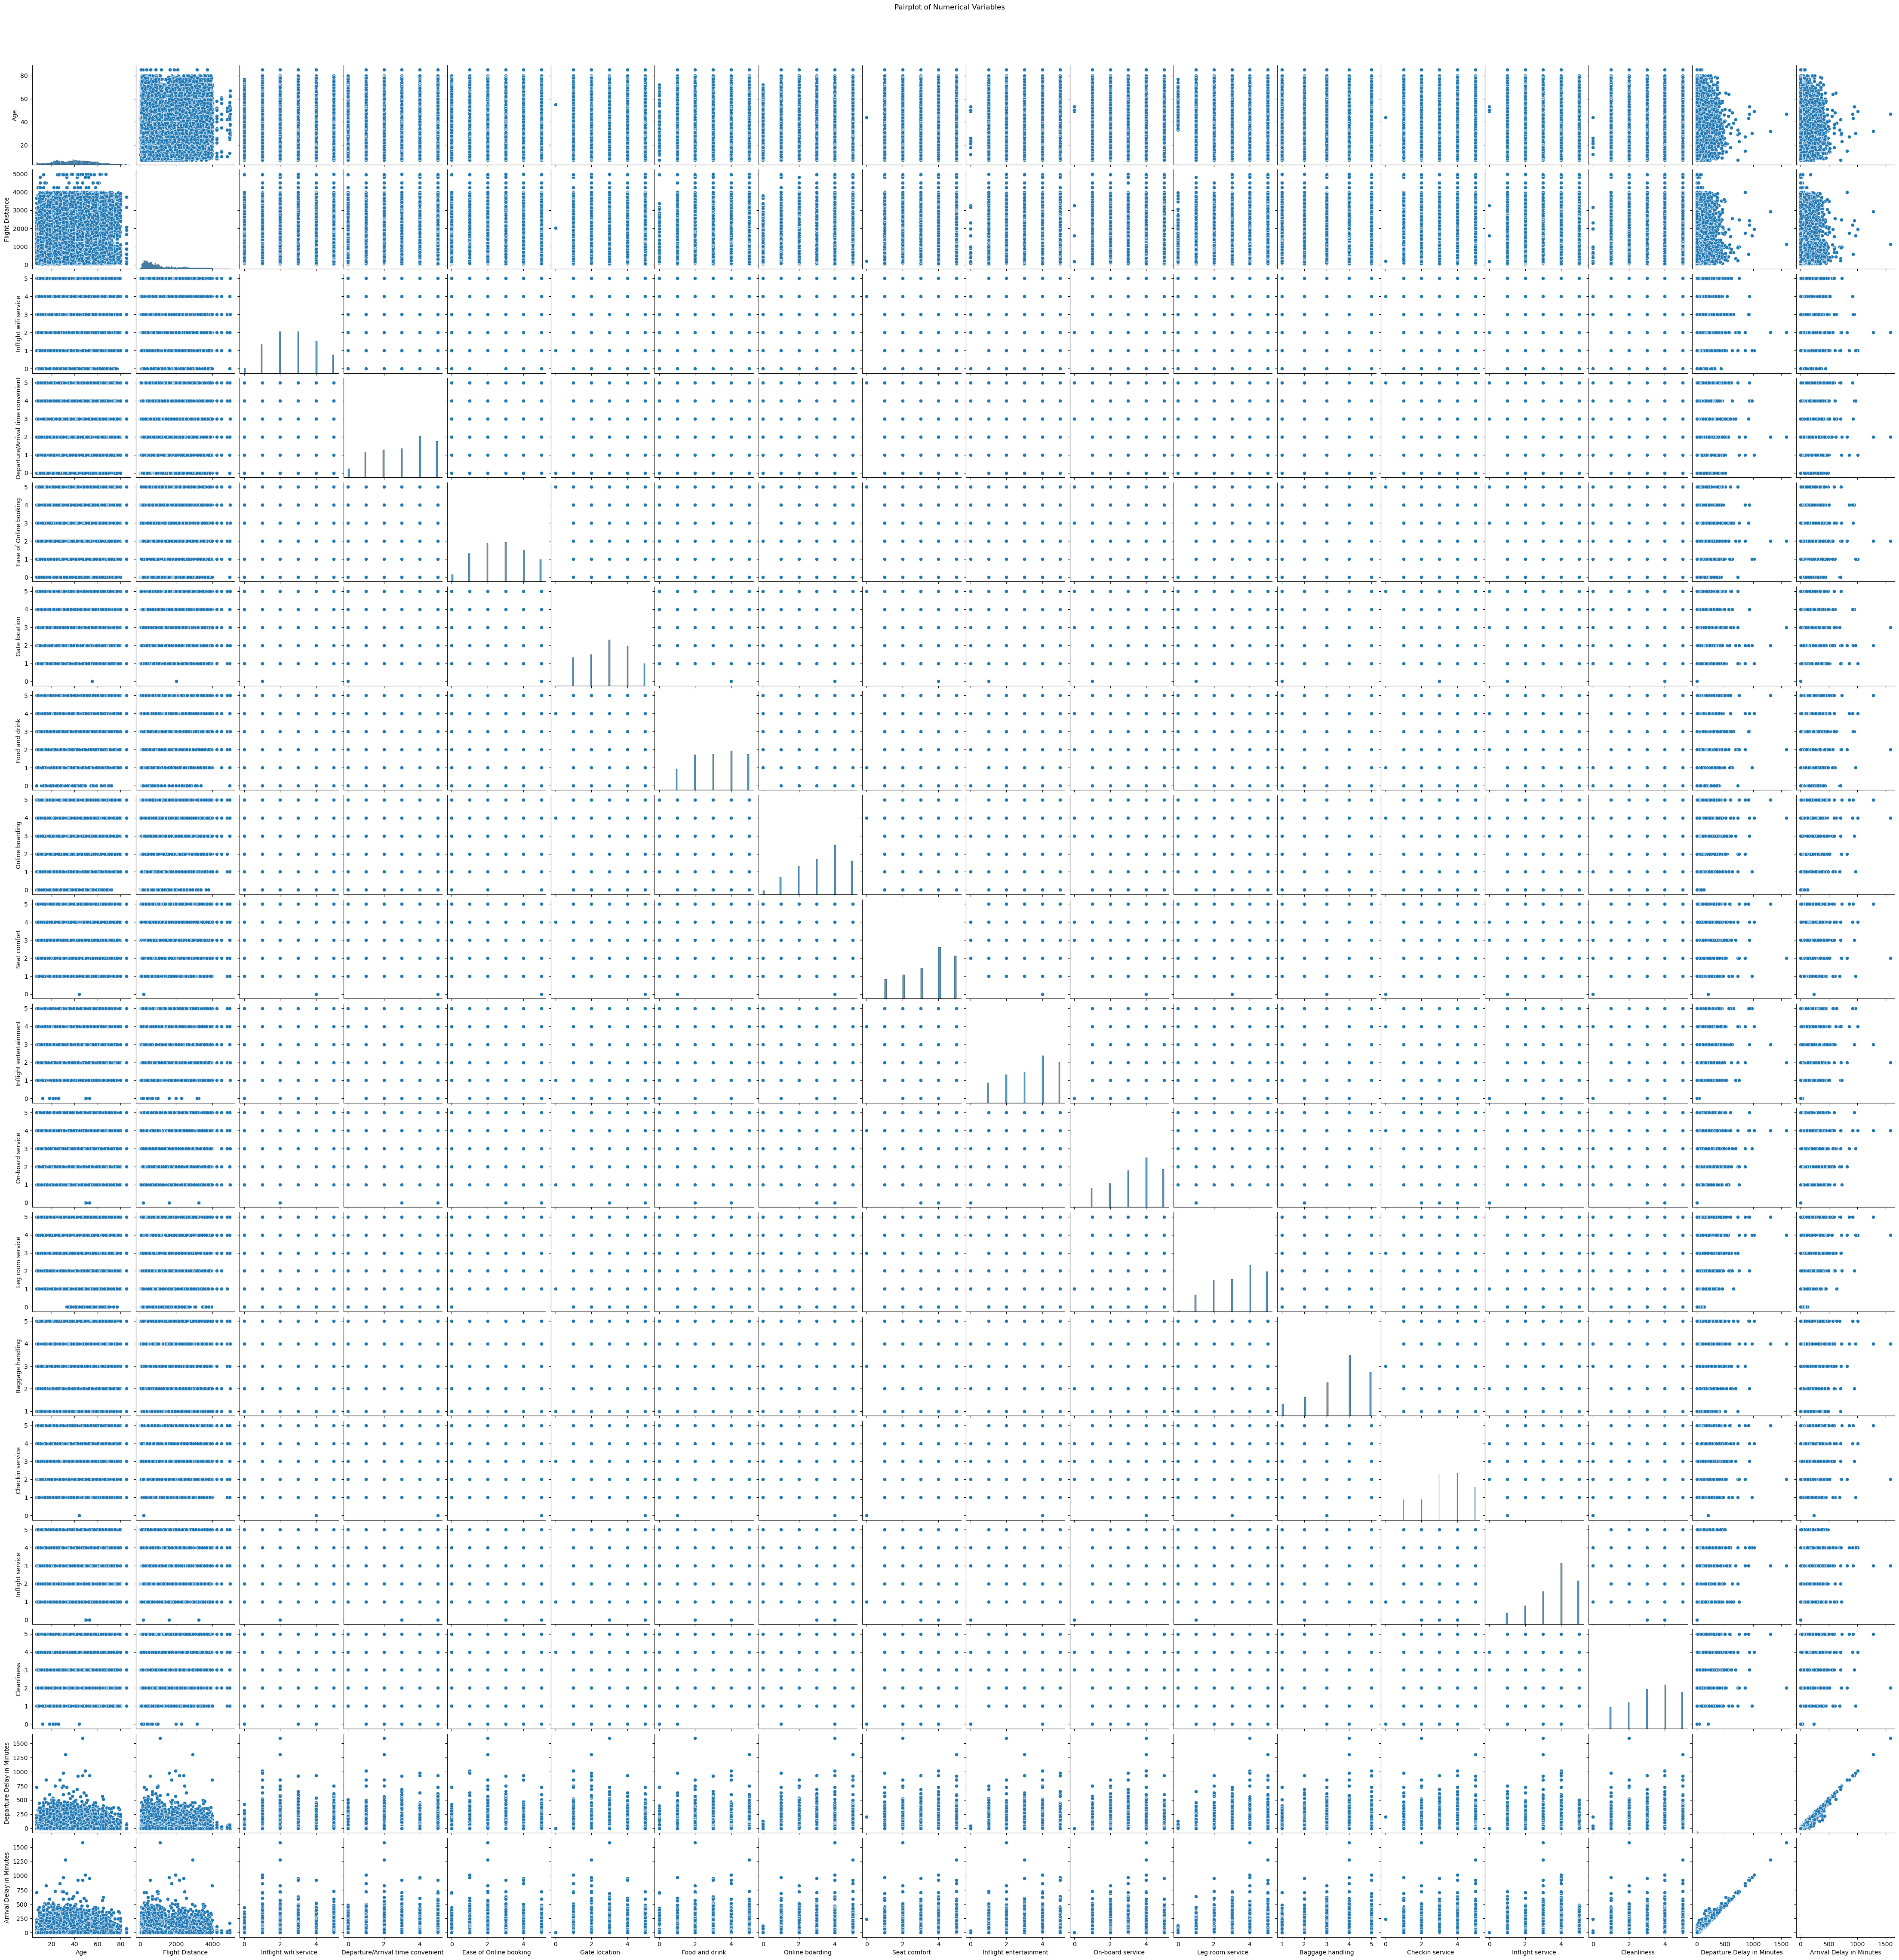

In [34]:
numerical_vars=df_train.select_dtypes(include=['int64','float64'])
sns.pairplot(numerical_vars)
plt.suptitle('Pairplot of Numerical Variables',y=1.02)
plt.show()

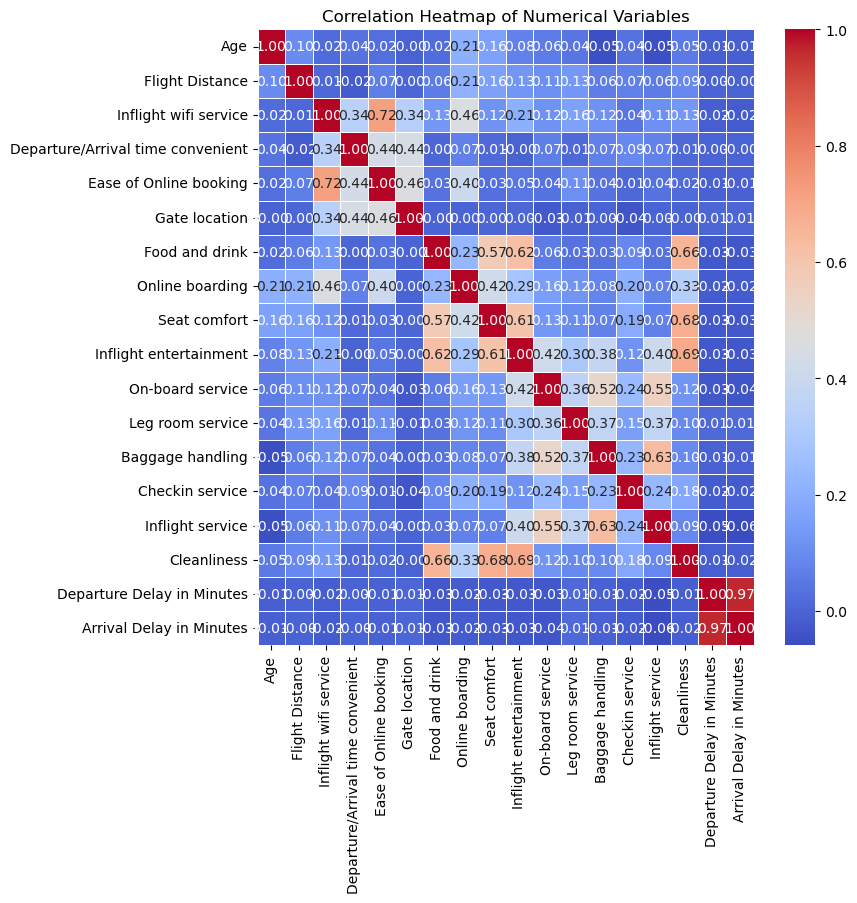

In [35]:
plt.figure(figsize=(8, 8))
corr = numerical_vars.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

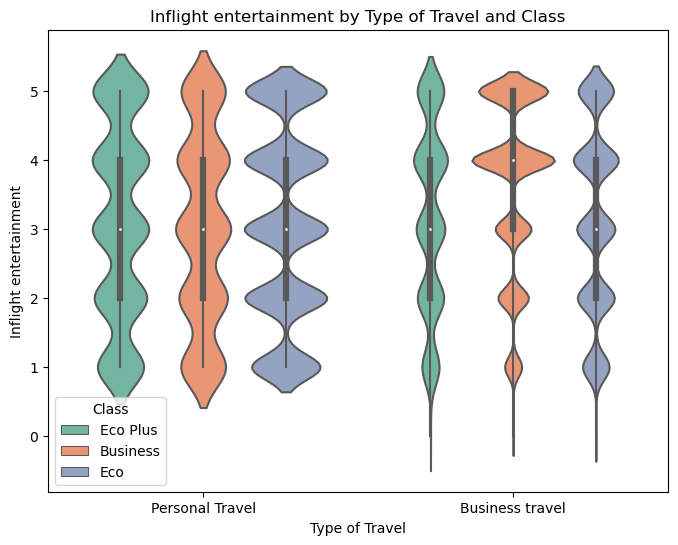

In [36]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Type of Travel', y='Inflight entertainment', hue='Class', data=df_train, palette='Set2')
plt.title('Inflight entertainment by Type of Travel and Class')
plt.xlabel('Type of Travel')
plt.ylabel('Inflight entertainment')
plt.legend(title='Class')
plt.show()

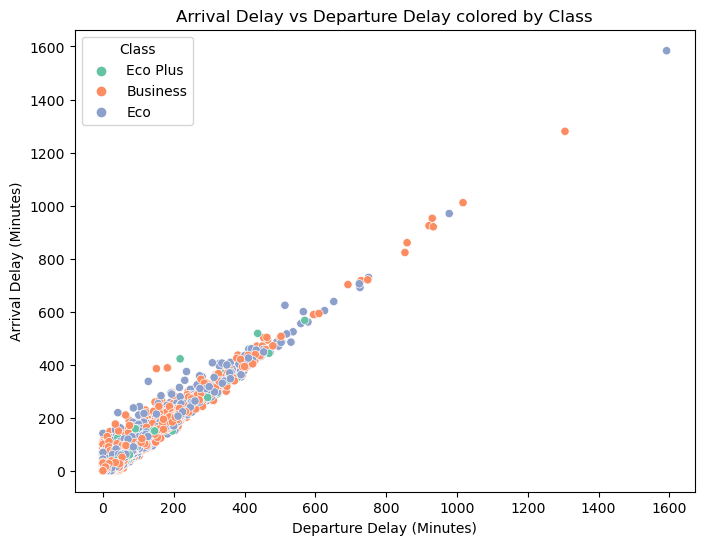

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', hue='Class', data=df_train, palette='Set2')
plt.title('Arrival Delay vs Departure Delay colored by Class')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Arrival Delay (Minutes)')
plt.legend(title='Class')
plt.show()

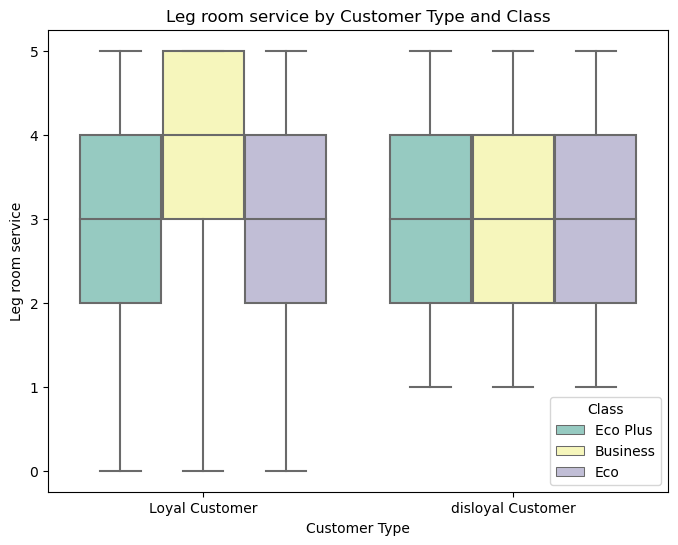

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer Type', y='Leg room service', hue='Class', data=df_train, palette='Set3')
plt.title('Leg room service by Customer Type and Class')
plt.xlabel('Customer Type')
plt.ylabel('Leg room service')
plt.legend(title='Class')
plt.show()

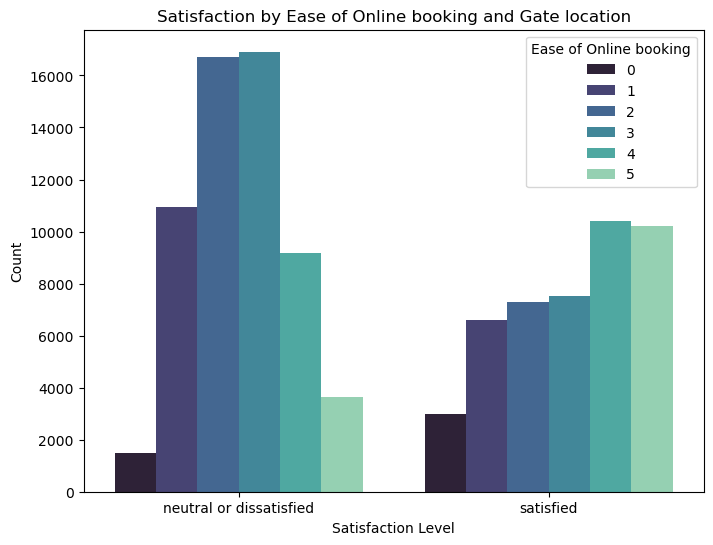

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='satisfaction', hue='Ease of Online booking', data=df_train, palette='mako')
plt.title('Satisfaction by Ease of Online booking and Gate location')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.legend(title='Ease of Online booking')
plt.show()

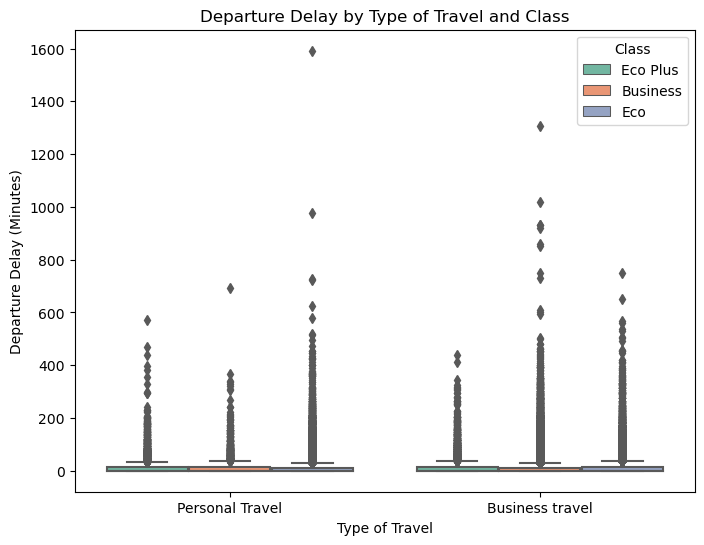

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type of Travel', y='Departure Delay in Minutes', hue='Class', data=df_train, palette='Set2')
plt.title('Departure Delay by Type of Travel and Class')
plt.xlabel('Type of Travel')
plt.ylabel('Departure Delay (Minutes)')
plt.legend(title='Class')
plt.show()

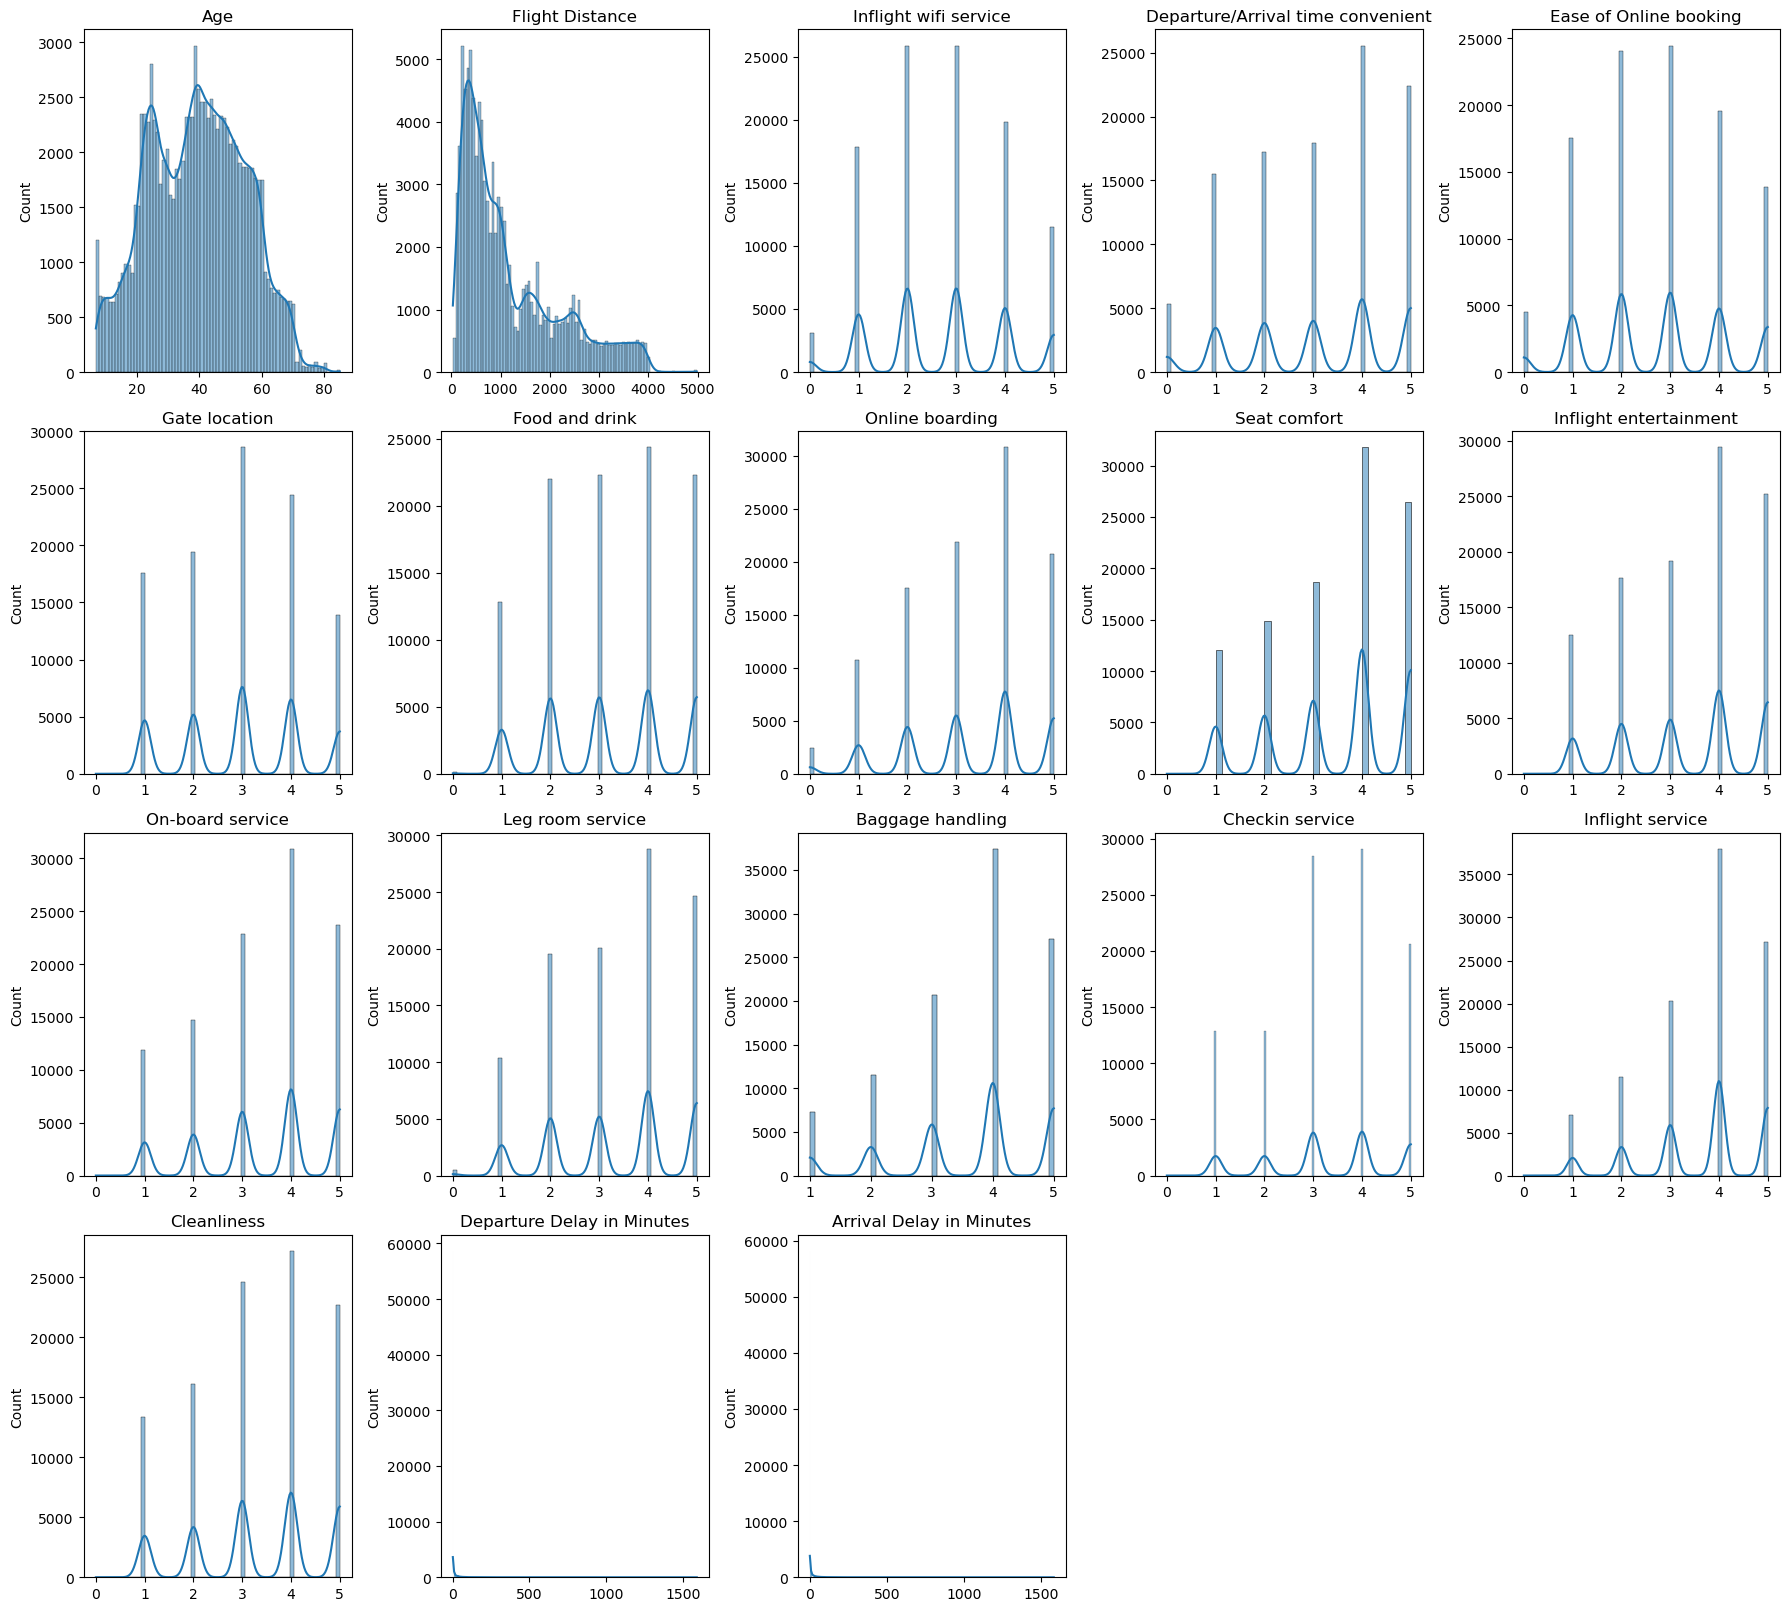

In [41]:
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(18, 4 * 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(df_train[col], kde=True)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [42]:
x_train=df_train.drop('satisfaction',axis=1)
y_train=df_train['satisfaction']
x_test=df_test.drop('satisfaction',axis=1)
y_test=df_test['satisfaction']

In [43]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [44]:
categorical_features = x_train.select_dtypes(exclude=['int64', 'float64']).columns
numerical_features = x_train.select_dtypes(include=['int64', 'float64']).columns

In [45]:
def boxcox_transform(data):
    transformed_data = np.zeros(data.shape)
    for i in range(data.shape[1]):
        transformed_data[:, i], _ = boxcox(data[:, i] + 1)  # Adding 1 to handle zero values
    return transformed_data

In [46]:
numeric_transformer_boxcox = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('boxcox', FunctionTransformer(boxcox_transform, validate=True))  # Apply Box-Cox transformation
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder()) 
])

In [47]:
preprocessor_boxcox = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_boxcox, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [48]:
x_train_processed_boxcox = preprocessor_boxcox.fit_transform(x_train)
x_test_processed_boxcox = preprocessor_boxcox.transform(x_test)

In [49]:
x_train_processed_boxcox.shape

(103904, 27)

In [50]:
y_train.shape

(103904,)

In [51]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize the parameters of the neural network using He initialization.

    Arguments:
    input_size -- number of input features
    hidden_size -- number of neurons in the hidden layer
    output_size -- number of neurons in the output layer

    Returns:
    parameters -- dictionary containing the initialized parameters
    """
    np.random.seed(0) 
    W1 = np.random.randn(hidden_size, input_size) * np.sqrt(2/input_size)
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * np.sqrt(2/hidden_size)
    b2 = np.zeros((output_size, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [52]:
def sigmoid(z):
    """
    Compute the sigmoid activation function.

    Arguments:
    z -- input to the activation function

    Returns:
    A -- output of the activation function
    """
    return 1 / (1 + np.exp(-z))

In [53]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation to compute the output of the neural network.

    Arguments:
    X -- input data of shape (input_size, m)
    parameters -- dictionary containing the parameters (W1, b1, W2, b2)

    Returns:
    A2 -- output of the neural network
    cache -- dictionary containing the intermediate values needed for backpropagation
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [54]:
def compute_cost(A2, Y):
    """
    Compute the cross-entropy cost function.

    Arguments:
    A2 -- output of the neural network (probability of positive class)
    Y -- true labels

    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]

    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
    cost = - np.sum(logprobs) / m

    cost = np.squeeze(cost)  
    return cost

In [55]:
def backward_propagation(parameters, cache, X, Y):
    """
    Perform backward propagation to compute gradients.

    Arguments:
    parameters -- dictionary containing the parameters (W1, b1, W2, b2)
    cache -- dictionary containing the intermediate values from forward propagation
    X -- input data
    Y -- true labels

    Returns:
    grads -- dictionary containing the gradients of the parameters
    """
    m = X.shape[1] 

    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))  
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [56]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent.

    Arguments:
    parameters -- dictionary containing the parameters (W1, b1, W2, b2)
    grads -- dictionary containing the gradients of the parameters
    learning_rate -- learning rate for gradient descent

    Returns:
    parameters -- dictionary containing the updated parameters
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [57]:
def train_nn(X, Y, input_size, hidden_size, output_size, num_epochs, learning_rate):
    """
    Train the neural network model.

    Arguments:
    X -- input data
    Y -- true labels
    input_size -- number of input features
    hidden_size -- number of neurons in the hidden layer
    output_size -- number of neurons in the output layer
    num_epochs -- number of training epochs
    learning_rate -- learning rate for gradient descent

    Returns:
    parameters -- dictionary containing the trained parameters
    """
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(num_epochs):
      
        A2, cache = forward_propagation(X, parameters)
      
        cost = compute_cost(A2, Y)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads, learning_rate)
       
        if epoch % 100 == 0:
            print(f"Cost after epoch {epoch}: {cost}")

    return parameters

In [58]:
def predict(parameters, X):
    """
    Make predictions using the trained neural network model.

    Arguments:
    parameters -- dictionary containing the trained parameters
    X -- input data, can be a single observation or multiple observations

    Returns:
    predictions -- array containing the predicted labels (0 or 1) for each observation
    """
    A2, _ = forward_propagation(X, parameters)
    predictions = np.round(A2)  

    if predictions.ndim == 1:
        return int(predictions.item())  
    else:
        return predictions

In [59]:
input_size = x_train_processed_boxcox.shape[1]
hidden_size = 25
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [60]:
parameters = train_nn(x_train_processed_boxcox.T, y_train.reshape(1, -1), input_size, hidden_size, output_size, num_epochs, learning_rate)
predictions_train = predict(parameters, x_train_processed_boxcox.T)

Cost after epoch 0: 1.0020093033141677
Cost after epoch 100: 0.6223438355325118
Cost after epoch 200: 0.5982531275036258
Cost after epoch 300: 0.5747975396715452
Cost after epoch 400: 0.552774627731282
Cost after epoch 500: 0.5335125874471938
Cost after epoch 600: 0.5159094277139674
Cost after epoch 700: 0.49973792693966385
Cost after epoch 800: 0.4850061660554776
Cost after epoch 900: 0.47160640427050743


In [61]:
def accuracy(y_true, y_pred):
    """
    Compute the accuracy of the predictions.

    Arguments:
    y_true -- true labels
    y_pred -- predicted labels

    Returns:
    acc -- accuracy
    """
    return np.mean(y_true == y_pred)

In [62]:
train_accuracy = accuracy(y_train, predictions_train.squeeze())
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.8145307206652295


In [63]:
predictions_test = predict(parameters, x_test_processed_boxcox.T)

In [64]:
test_accuracy = accuracy(y_test, predictions_test.squeeze())
print(f"Training Accuracy: {test_accuracy}")

Training Accuracy: 0.8147135817677856


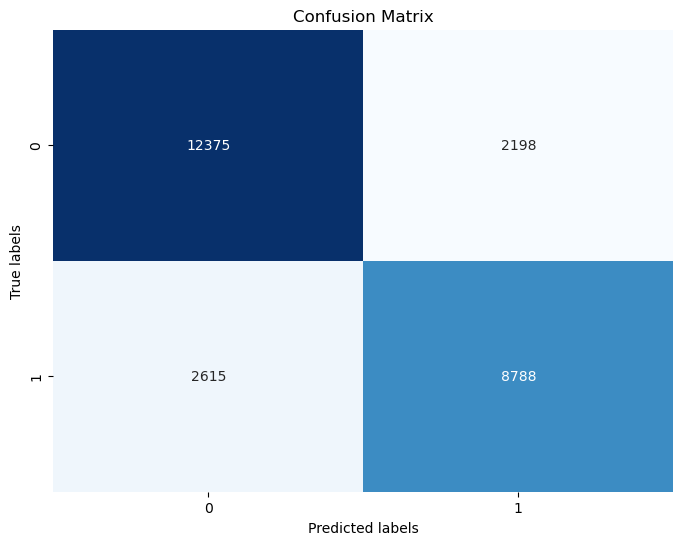

In [65]:
y_true = y_test
y_pred = predictions_test.squeeze()
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()